# Bank Marketing

## Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Attribute Information:

Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Contact: contact communication type (categorical:   'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')

Day_of_week: last contact day of the week (categorical:'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric)

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not
previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')

Emp.var.rate: employment variation rate - quarterly indicator(numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [23]:
df = pd.read_csv('data/bank-additional-full.csv',delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [24]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [26]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: xlabel='y'>

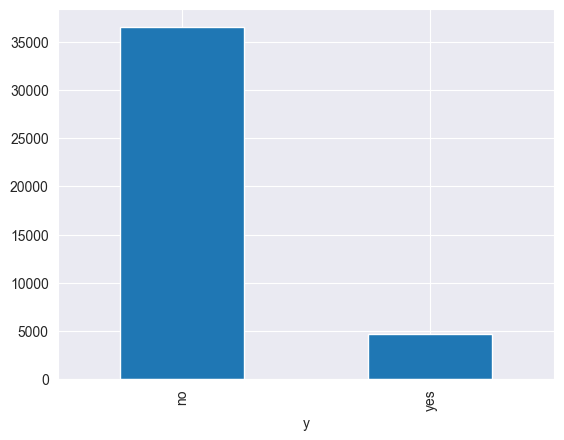

In [27]:
df['y'].value_counts().plot(kind='bar')

In [28]:
def set_y(val):
    return  1 if val == 'yes' else 0

In [29]:
df['y'] = df['y'].apply(set_y)

## Data Preparation and Visualisation

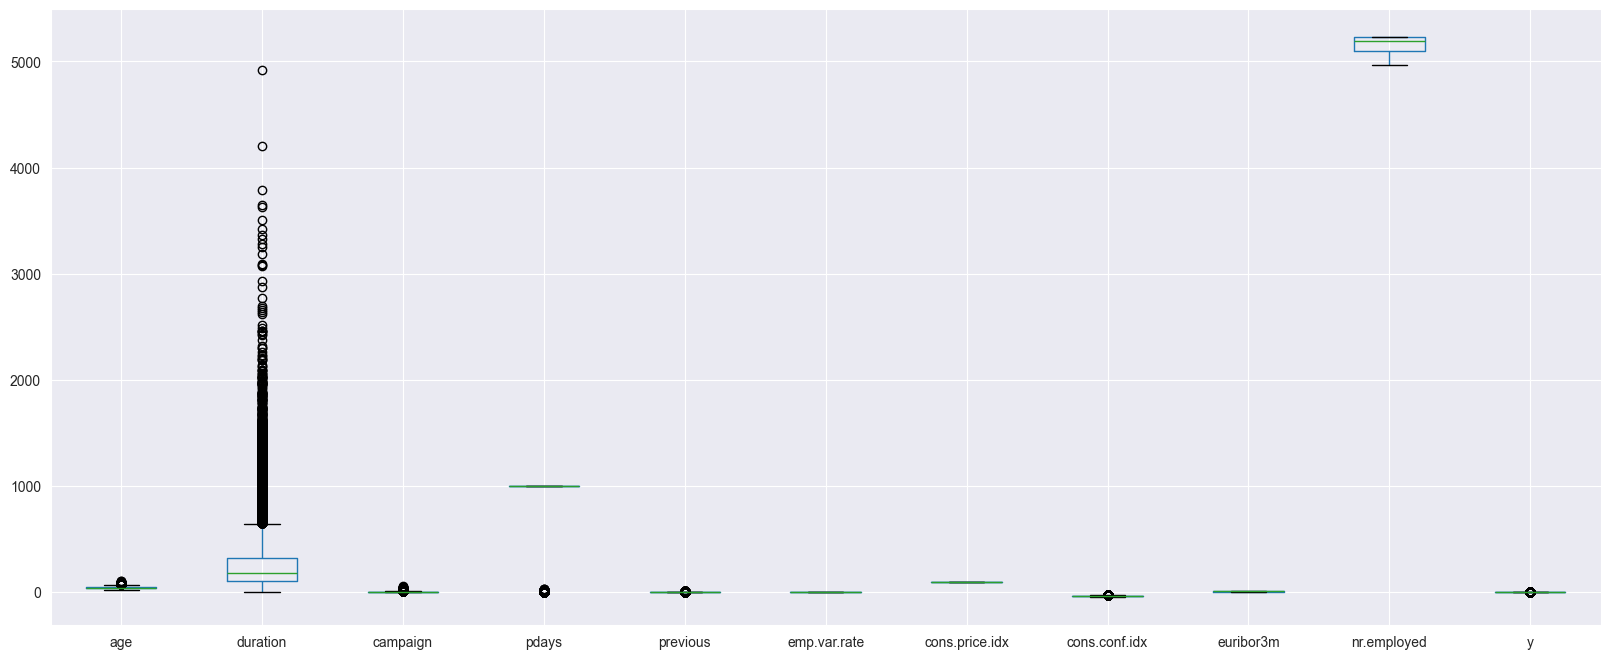

In [30]:
plt.figure(figsize = (20,8))
df.boxplot()
plt.show()

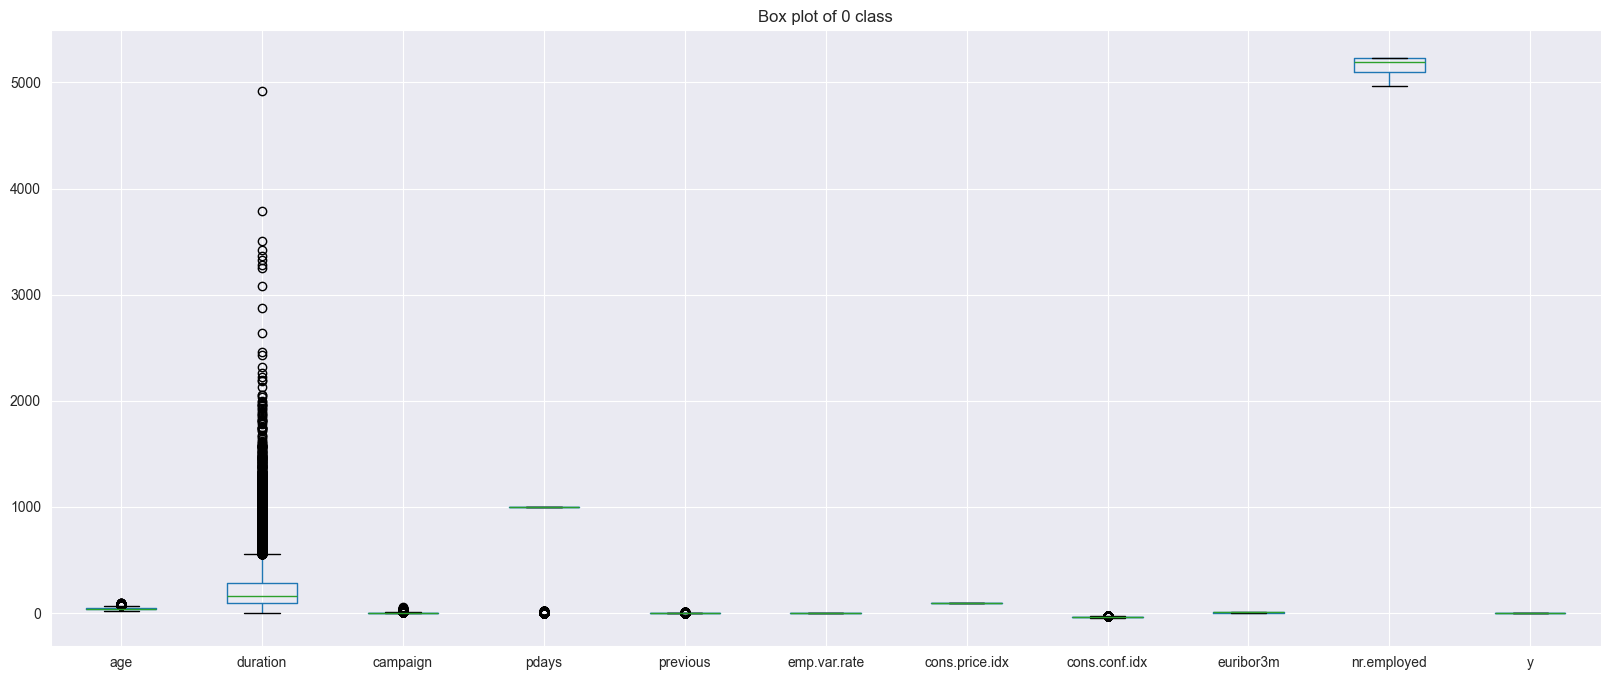

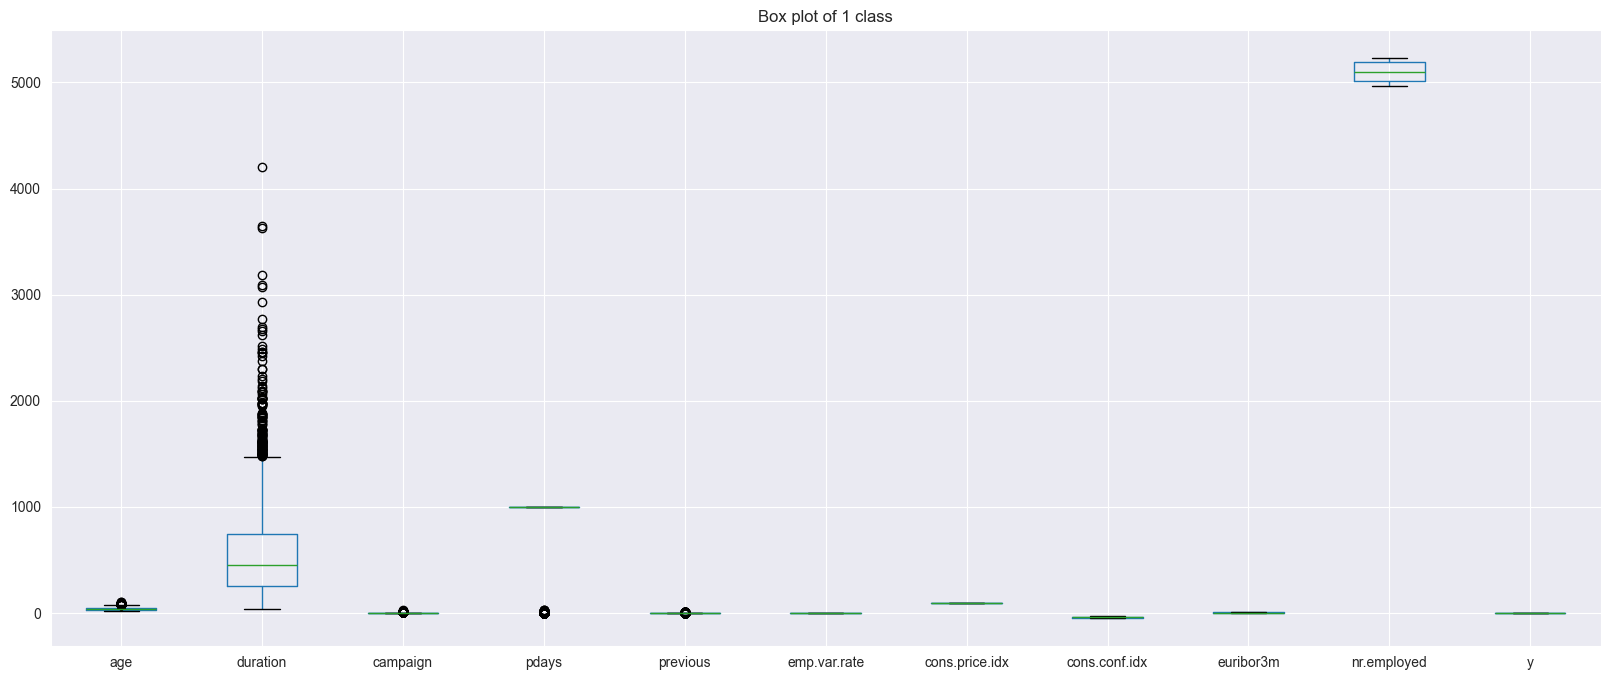

In [31]:
unique_class = df['y'].unique()
for i in unique_class:
    plt.figure(figsize = (20,8))
    df[df['y'] == i].boxplot()
    plt.title('Box plot of {i} class'.format(i=i))
    plt.show()

Заклучок: Бидејќи outlier-те во овој случај само  kaj атрибутот 'duration' и 'pdays' отстапува премногу од интервалот следува дека ќе се направи  отфрлање на оние податоци каде овој атрибут отстапува од интервалот на доверба.

In [32]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['duration'] >= lower) & (df['duration'] <= upper)]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [33]:
Q1 = df['pdays'].quantile(0.25)
Q3 = df['pdays'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['pdays'] >= lower) & (df['pdays'] <= upper)]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


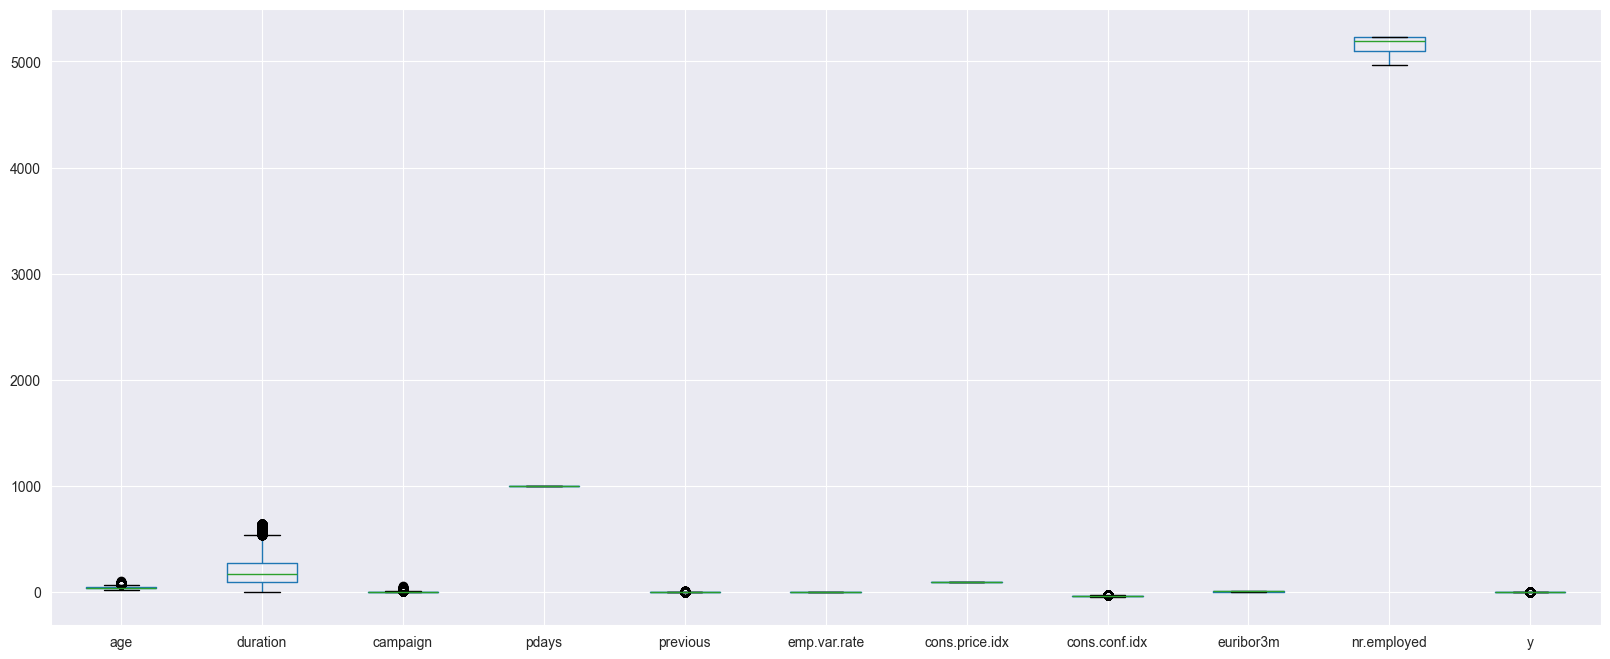

In [34]:
plt.figure(figsize = (20,8))
df.boxplot()
plt.show()

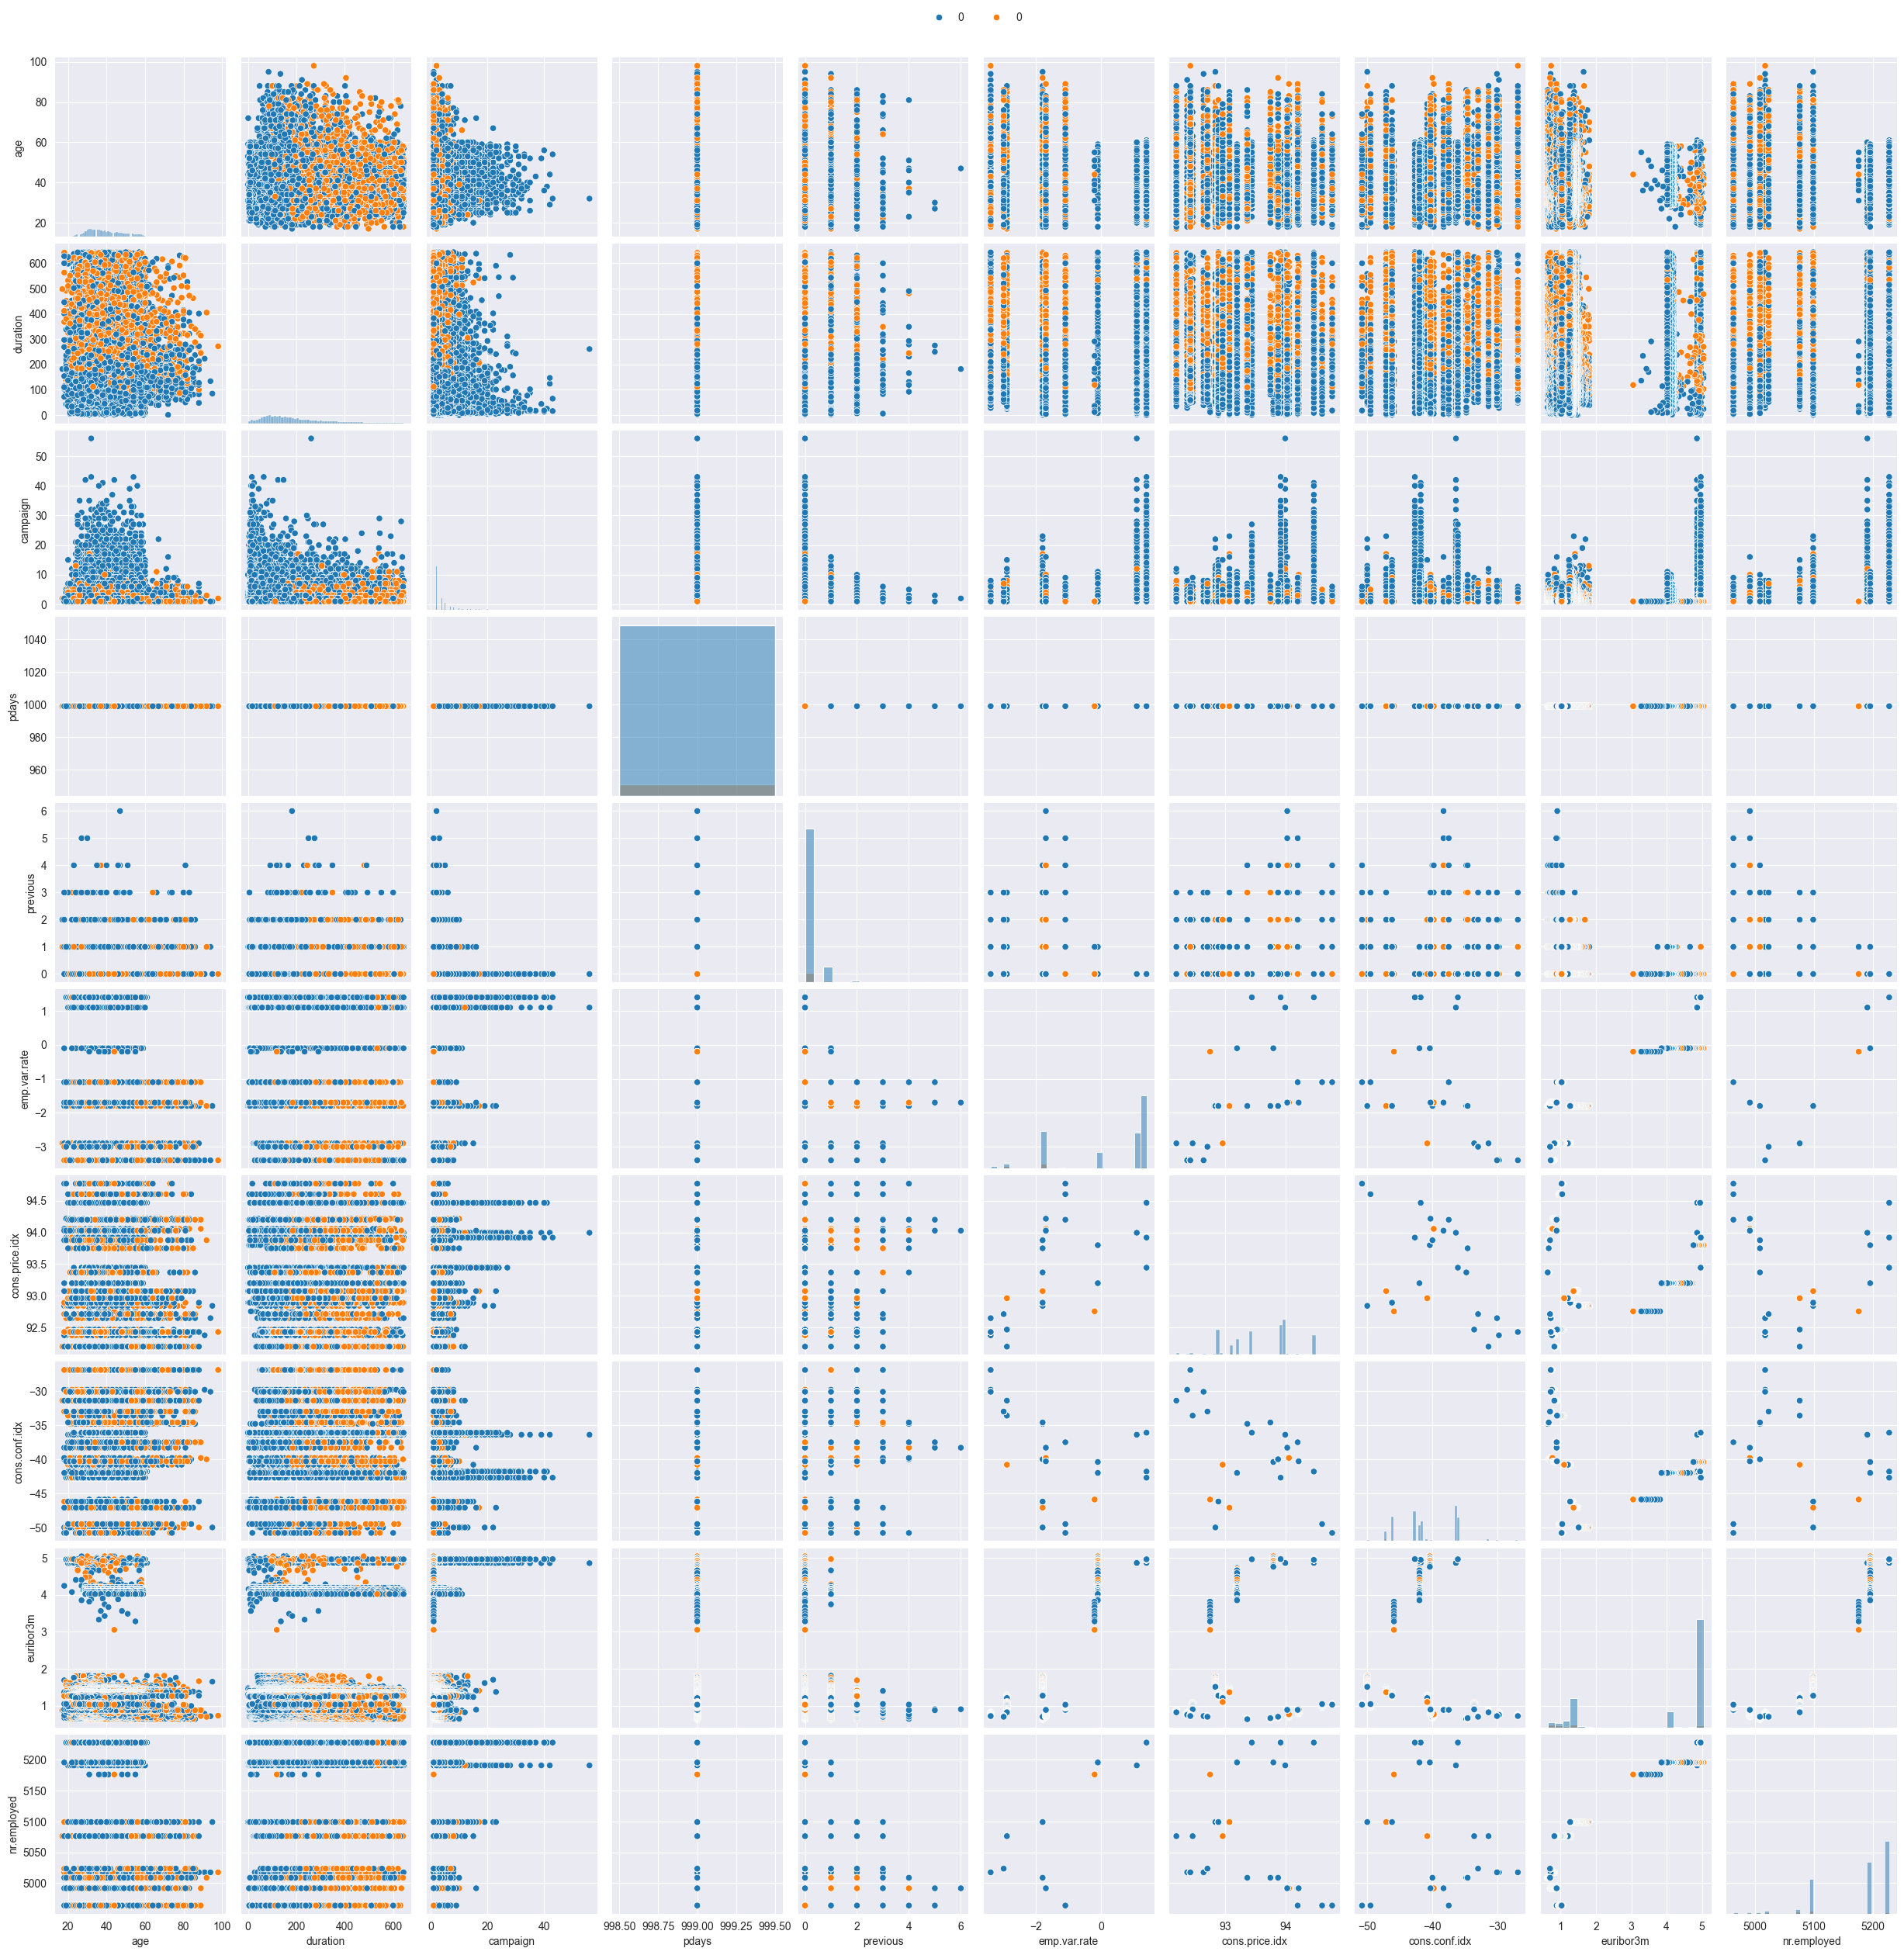

In [35]:
g=sns.pairplot(df, hue="y", diag_kind="hist")
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, 1),ncol=2, title=None)
for t, l in zip(g._legend.texts, df['y']):
    t.set_text(l)

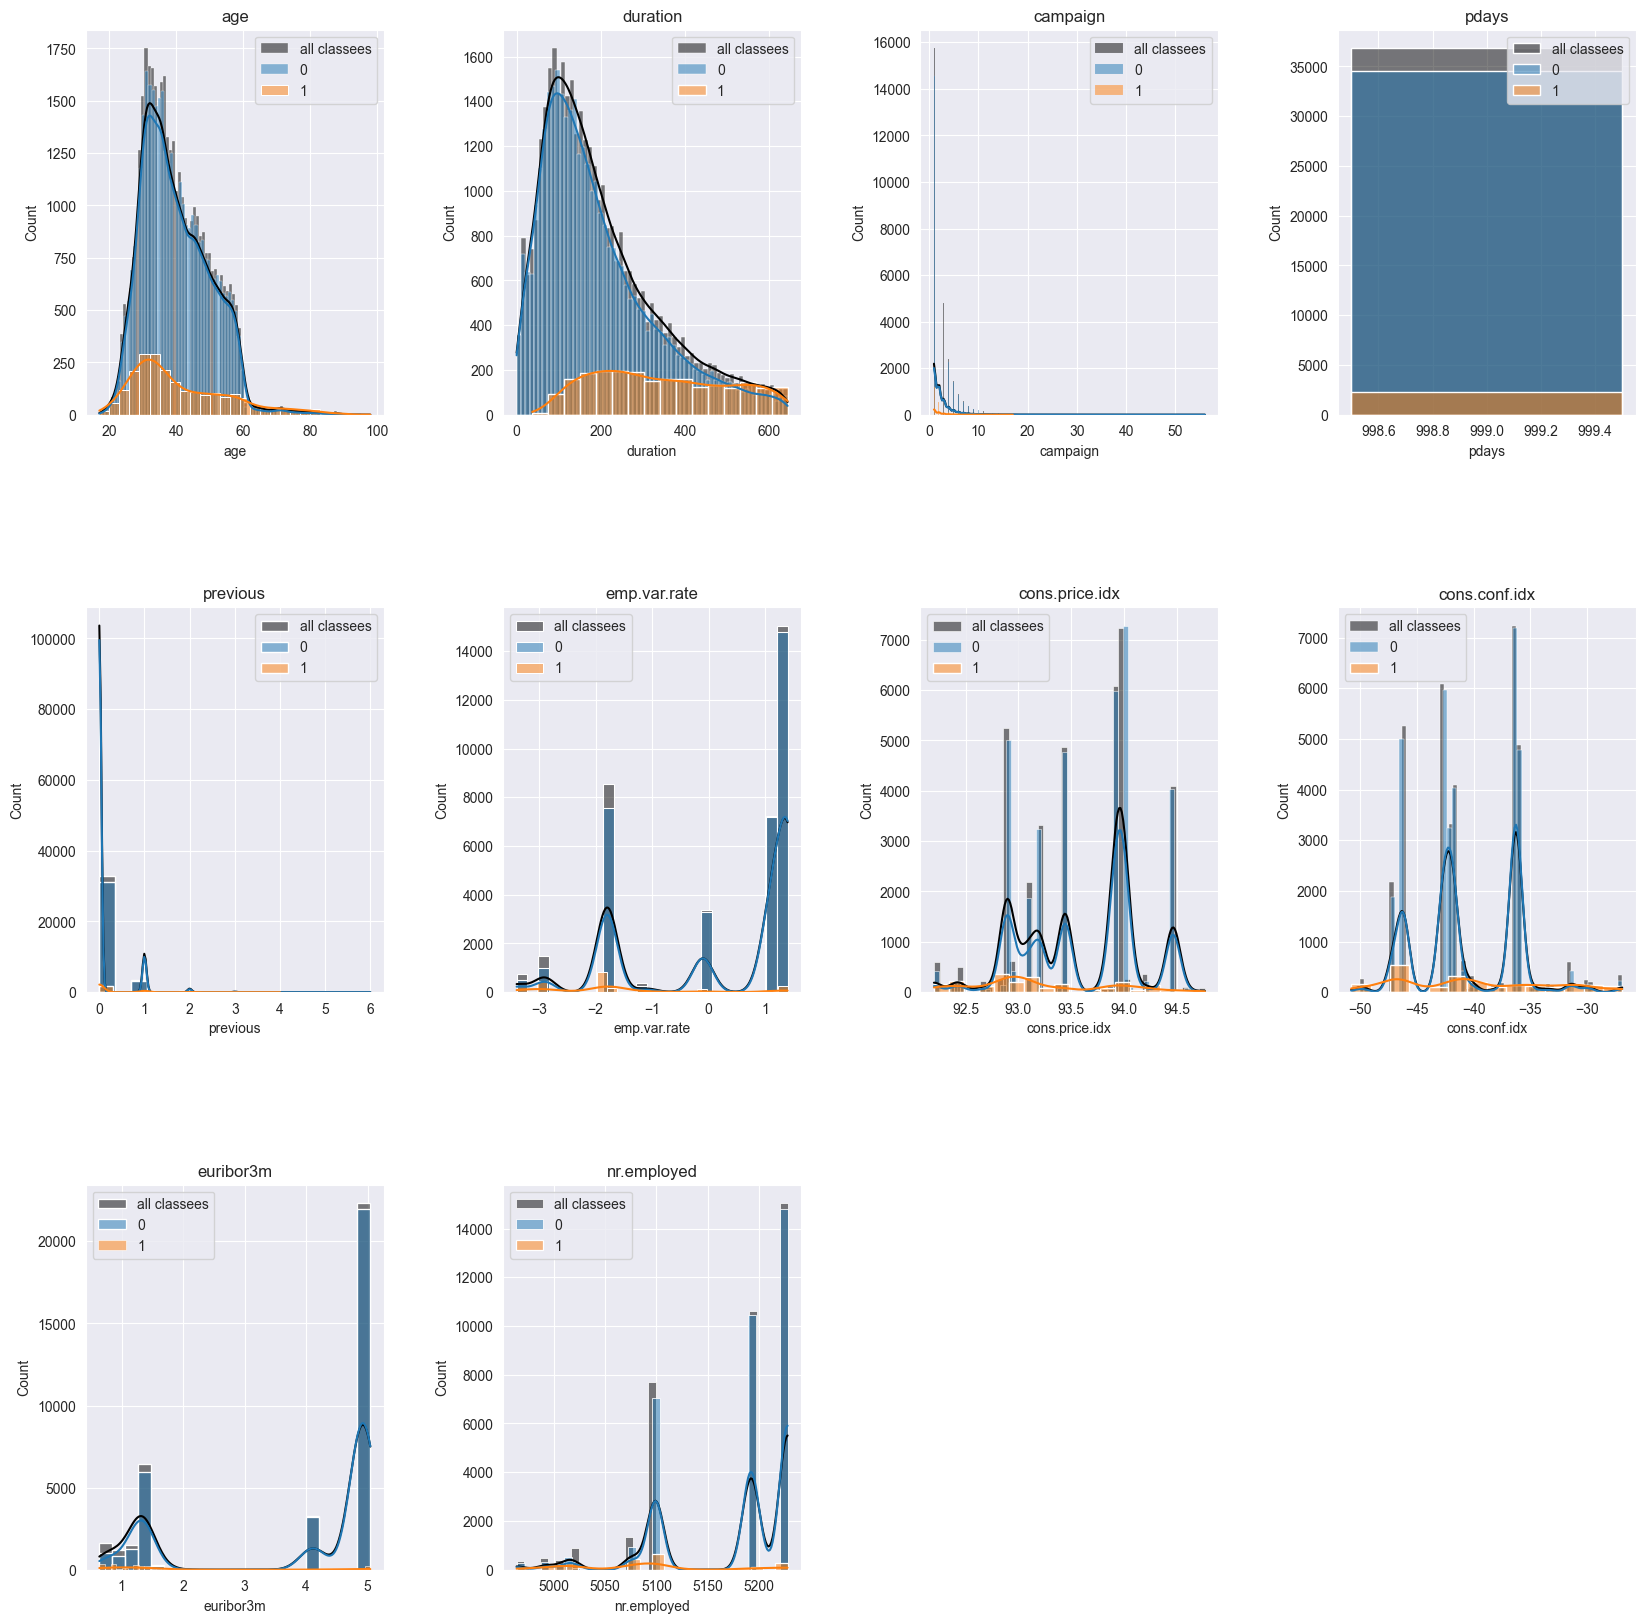

In [38]:
all_features = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.4) 
n_features = len(all_features)
for f in range(n_features):
    ax = plt.subplot(3,4,f+1)
    plt.title(all_features[f])
    sns.histplot(df[all_features[f]],color='black',label='all classees',kde=True,stat="count") 
    for t in range(len(unique_class)): # се прикажува хистограм на вредностите на соодветниот атрибут за секоја класа посебно
        sns.histplot(df[df['y'] == unique_class[t]][all_features[f]], 
                 label=unique_class[t], kde=True, stat="count")
    plt.legend()
plt.show()

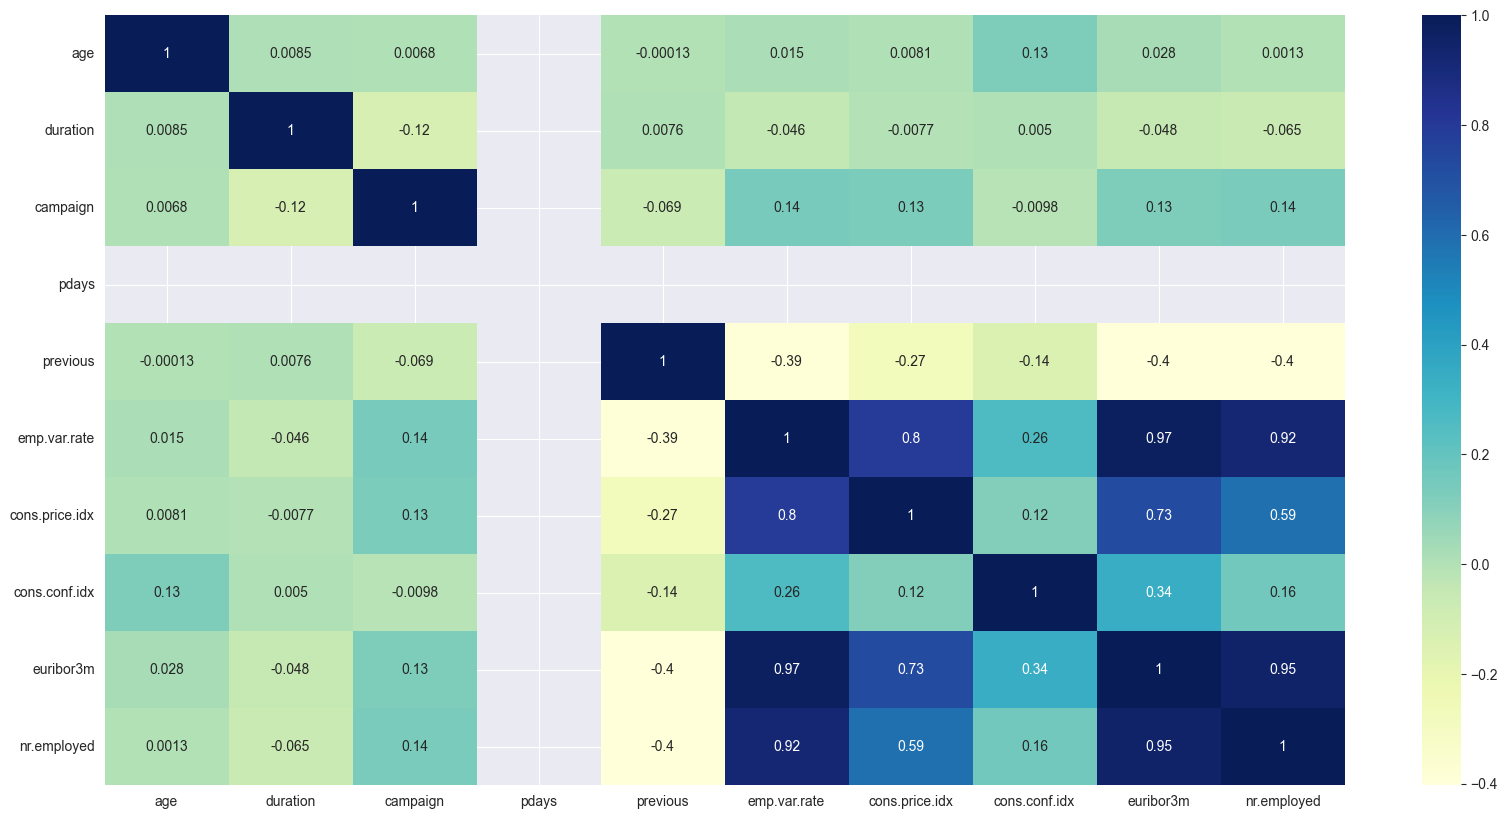

In [40]:
plt.figure(figsize = (20,10))
sns.heatmap(df[all_features].corr(),annot=True,cmap="YlGnBu")
plt.show()

In [41]:
def label_encoder(df:pd.DataFrame,columns:list):
    for col in columns:
        encoder = LabelEncoder()
        hasUnknown = (df[col] == "unknown").any()
        df[col] = encoder.fit_transform(df[col].astype(str))
        if hasUnknown:
            has_unknown = encoder.transform(["unknown"])[0]
            df.loc[df[col] == has_unknown, col] = np.nan
    
    return df

In [42]:
df = label_encoder(df,['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
df

C:\Users\Jovan\AppData\Local\Temp\ipykernel_24988\2115424892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col].astype(str))
C:\Users\Jovan\AppData\Local\Temp\ipykernel_24988\2115424892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col].astype(str))
C:\Users\Jovan\AppData\Local\Temp\ipykernel_24988\2115424892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7.0,1.0,3.0,NaN,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7.0,1.0,3.0,0.0,2.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.0,1.0,1.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7.0,1.0,3.0,0.0,0.0,2.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.0,2.0,0.0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1.0,1.0,5.0,0.0,0.0,0.0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5.0,1.0,6.0,0.0,2.0,0.0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9.0,1.0,5.0,0.0,0.0,0.0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [47]:
df['housing'].value_counts(dropna=False)

housing
2.0    19293
0.0    16666
NaN      893
Name: count, dtype: int64

In [48]:
iterative_model = IterativeImputer()
imputed_values = iterative_model.fit_transform(df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']])
df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]= imputed_values
df

C:\Users\Jovan\AppData\Local\Temp\ipykernel_24988\1949954826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]= imputed_values


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1.0,0.0,0.000000,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7.0,1.0,3.0,0.000315,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7.0,1.0,3.0,0.000000,2.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.0,1.0,1.0,0.000000,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7.0,1.0,3.0,0.000000,0.0,2.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.0,1.0,5.0,0.000000,2.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1.0,1.0,5.0,0.000000,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5.0,1.0,6.0,0.000000,2.0,0.0,0.0,7.0,0.0,...,2,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9.0,1.0,5.0,0.000000,0.0,0.0,0.0,7.0,0.0,...,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36852 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36852 non-null  int64  
 1   job             36852 non-null  float64
 2   marital         36852 non-null  float64
 3   education       36852 non-null  float64
 4   default         36852 non-null  float64
 5   housing         36852 non-null  float64
 6   loan            36852 non-null  float64
 7   contact         36852 non-null  float64
 8   month           36852 non-null  float64
 9   day_of_week     36852 non-null  float64
 10  duration        36852 non-null  int64  
 11  campaign        36852 non-null  int64  
 12  pdays           36852 non-null  int64  
 13  previous        36852 non-null  int64  
 14  poutcome        36852 non-null  float64
 15  emp.var.rate    36852 non-null  float64
 16  cons.price.idx  36852 non-null  float64
 17  cons.conf.idx   36852 non-null  floa

In [54]:
def set_scalar(df:pd.DataFrame,columns:list):
    for col in columns:
        scaler = MinMaxScaler()
        df[col] = scaler.fit_transform(df[[col]])
    
    return df

In [55]:
df = set_scalar(df,all_features)
df

C:\Users\Jovan\AppData\Local\Temp\ipykernel_24988\2266439210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = scaler.fit_transform(df[[col]])
C:\Users\Jovan\AppData\Local\Temp\ipykernel_24988\2266439210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = scaler.fit_transform(df[[col]])
C:\Users\Jovan\AppData\Local\Temp\ipykernel_24988\2266439210.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,3.0,1.0,0.0,0.000000,0.0,0.0,1.0,6.0,1.0,...,0.000000,0.0,0.000000,1.0,0.937500,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,7.0,1.0,3.0,0.000315,0.0,0.0,1.0,6.0,1.0,...,0.000000,0.0,0.000000,1.0,0.937500,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,7.0,1.0,3.0,0.000000,2.0,0.0,1.0,6.0,1.0,...,0.000000,0.0,0.000000,1.0,0.937500,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,0.0,1.0,1.0,0.000000,0.0,0.0,1.0,6.0,1.0,...,0.000000,0.0,0.000000,1.0,0.937500,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,7.0,1.0,3.0,0.000000,0.0,2.0,1.0,6.0,1.0,...,0.000000,0.0,0.000000,1.0,0.937500,0.698753,0.60251,0.957379,0.859735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,5.0,1.0,5.0,0.000000,2.0,0.0,0.0,7.0,0.0,...,0.000000,0.0,0.000000,1.0,0.479167,1.000000,0.00000,0.089322,0.000000,1
41184,0.358025,1.0,1.0,5.0,0.000000,0.0,0.0,0.0,7.0,0.0,...,0.000000,0.0,0.000000,1.0,0.479167,1.000000,0.00000,0.089322,0.000000,0
41185,0.481481,5.0,1.0,6.0,0.000000,2.0,0.0,0.0,7.0,0.0,...,0.018182,0.0,0.000000,1.0,0.479167,1.000000,0.00000,0.089322,0.000000,0
41186,0.333333,9.0,1.0,5.0,0.000000,0.0,0.0,0.0,7.0,0.0,...,0.000000,0.0,0.000000,1.0,0.479167,1.000000,0.00000,0.089322,0.000000,1


## Training the models

In [56]:
X,y = df.drop('y', axis=1), df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Naive Bayes

In [57]:
model = GaussianNB()
model.fit(X_train, y_train)
print(f'Prior: {model.class_prior_}')

Prior: [0.93880805 0.06119195]


In [58]:
pred = model.predict(X_test)
print('Classification Report')
print(classification_report(y_test, pred,zero_division=0))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.71      0.83      6914
           1       0.16      0.82      0.27       457

    accuracy                           0.72      7371
   macro avg       0.57      0.77      0.55      7371
weighted avg       0.93      0.72      0.79      7371



<Axes: >

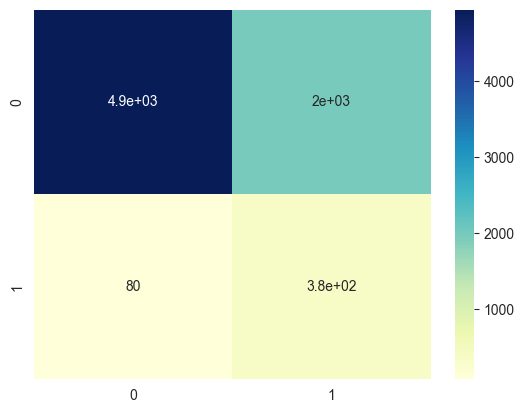

In [59]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,cmap="YlGnBu")

### LDA

In [63]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
print(f'Prior: {model.priors_}')

Prior: [0.93880805 0.06119195]


In [64]:
pred = model.predict(X_test)
print('Classification Report')
print(classification_report(y_test, pred,zero_division=0))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6914
           1       0.38      0.45      0.41       457

    accuracy                           0.92      7371
   macro avg       0.67      0.70      0.68      7371
weighted avg       0.93      0.92      0.92      7371



<Axes: >

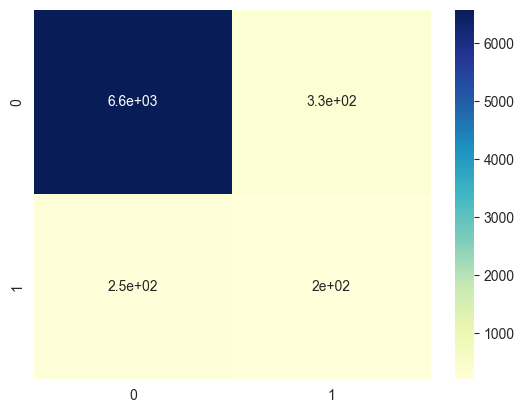

In [62]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,cmap="YlGnBu")

### QDA

In [66]:
model = QuadraticDiscriminantAnalysis(reg_param=0.2)
model.fit(X_train, y_train)
print(f'Prior: {model.priors_}')

Prior: [0.93880805 0.06119195]


In [67]:
pred = model.predict(X_test)
print('Classification Report')
print(classification_report(y_test, pred,zero_division=0))

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6914
           1       0.53      0.04      0.07       457

    accuracy                           0.94      7371
   macro avg       0.74      0.52      0.52      7371
weighted avg       0.91      0.94      0.91      7371



<Axes: >

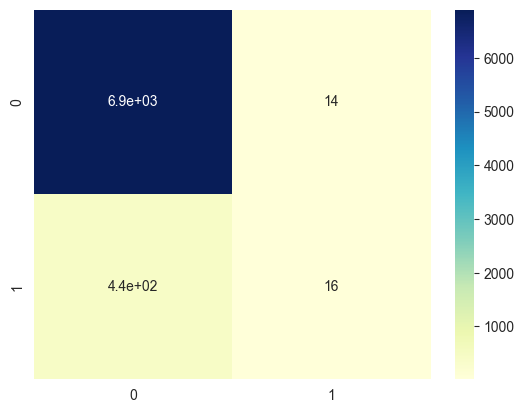

In [68]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,cmap="YlGnBu")

## Заклучок:
Со користење на наивен баесов класификатор заедно со дискриминантните анализа QDA LDA кои работат заедно на ист принцип може да заклучи дека трите модела имаат многу добри перформанси во предвидување на тоа дали е поднесен депозит од страна на клиентод и најдобар од трите модели е LDA.